In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [198]:
data = pd.read_csv('/Users/ash/Downloads/anonymized.csv')
data['Amount'].mean()

-3.351910576827948e-13

In [127]:
data = pd.read_csv('/Users/ash/Downloads/anonymized.csv')
# data.info()
def clean_date(obj): 
    obj = str(obj)
    date = obj[:2]
    year = obj[-4:]
    month = obj[2:-4]
    if month == 'Jan': 
        month = 1
    if month == 'Feb': 
        month = 2
    if month == 'Mar': 
        month = 3
    if month == 'Apr': 
        month = 4
    if month == 'May': 
        month = 5
    if month == 'Jun': 
        month = 6
    if month == 'Jul': 
        month = 7
    if month == 'Aug': 
        month = 8
    if month == 'Sep': 
        month = 9
    if month == 'Oct': 
        month = 10
    if month == 'Nov': 
        month = 11
    if month == 'Dec': 
        month = 12
    return date+' '+str(month)+' '+year
data['Date'] = data['Date'].apply(clean_date)
data = pd.concat([data, pd.DataFrame(data['Date'].str.split(' ',2).tolist())], axis=1)

data = data.drop(columns=['Date'])
data.columns = ['Amount', 'Day', 'Month', 'Year']
# data_kd = data.loc[data['Year'] == '2015']
new_data = pd.DataFrame(data['Month'].value_counts())
new_data.columns = ['Transactions']

In [128]:
new_data['Month'] = new_data.index
new_data.index = range(12)
new_data

,Transactions,Month
0,251,12
1,243,1
2,235,3
3,224,6
4,221,9
5,221,5
6,198,8
7,195,2
8,194,4
9,191,7


In [151]:
from sklearn.neighbors.kde import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(np.array(new_data['Transactions']).reshape(-1,1))
samples = kde.sample(1000)

<IPython.core.display.Javascript object>


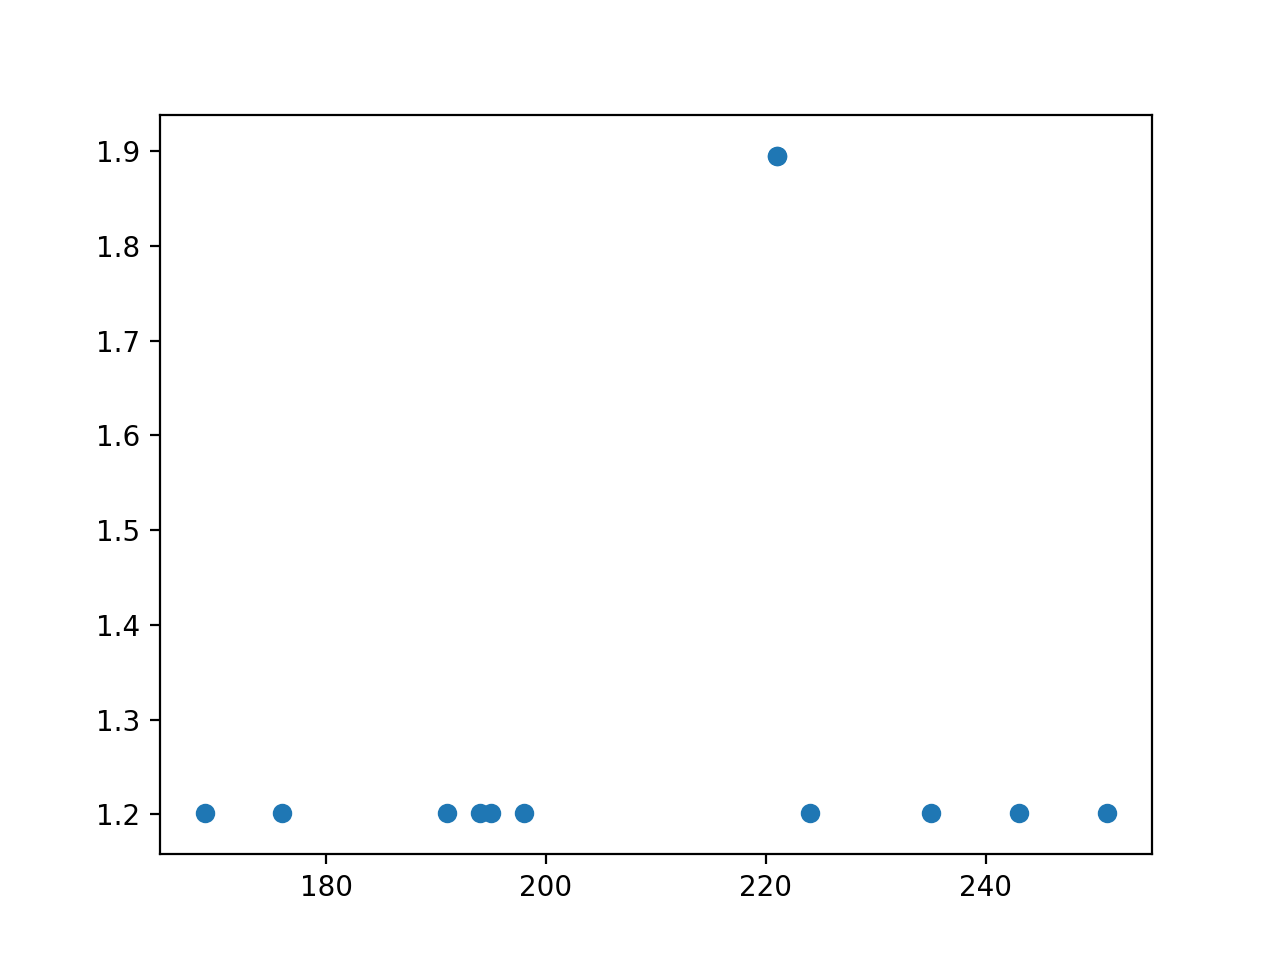

In [150]:
plt.scatter(np.array(new_data['Transactions']), kde.score_samples(np.array(new_data['Transactions']).reshape(-1,1)))
plt.show()

<IPython.core.display.Javascript object>


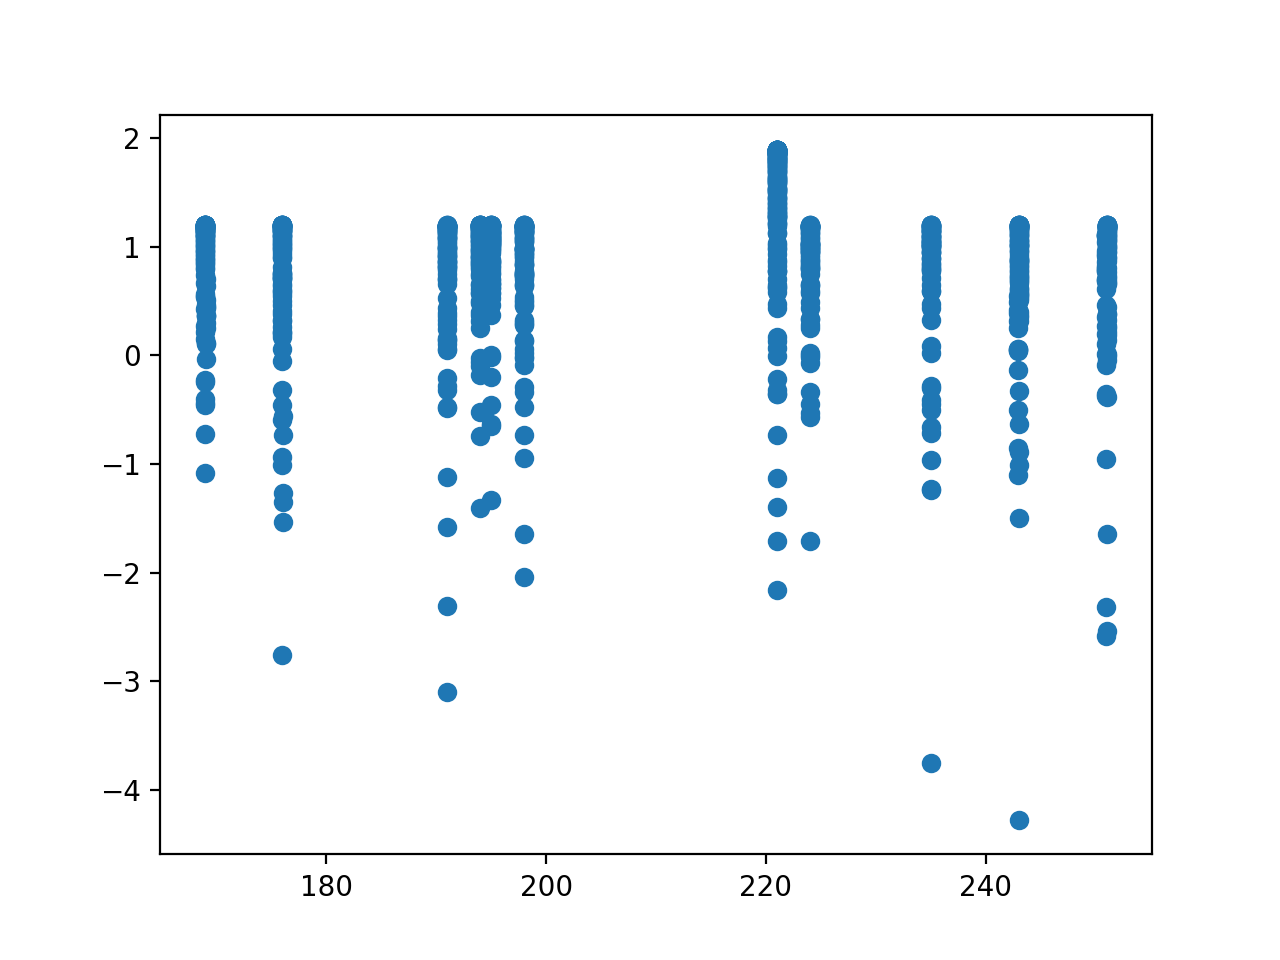

In [152]:
plt.scatter(samples, kde.score_samples(samples))
plt.show()

In [199]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

# print(people)

np.savetxt("/Users/ash/Downloads/questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("/Users/ash/Downloads/questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("/Users/ash/Downloads/questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

In [221]:
import numpy as np

answers = np.loadtxt("/Users/ash/Downloads/questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


# def expectation(answers, biases, p_clusters):
#     # In this function we create our expectations.
    
#     people = np.random.rand(n_people, n_clusters)

#     for _ in range(people.shape[0]):
#         people[_,:] = p_clusters * np.matmul(answers,biases)[_,:]
    

#     # normalize the distributions
#     people = people / people.sum(axis=1, keepdims=1)
#     return people

def expectation(answers, biases, p_clusters, people):
    people = np.zeros((n_people, n_clusters))
    
    for person in range(n_people):
        person_answers = answers[person]
        
        for cluster in range(n_clusters):
            
            p_cluster_given_answer =  p_clusters[cluster] #prior
            
            for question_i, answer in enumerate(person_answers):
                
                # join probability of cluster given observed answers
                p_cluster_given_answer *= (answer*biases[question_i, cluster] + (1-answer)*(1- biases[question_i, cluster]))
            
            
            people[person, cluster] = p_cluster_given_answer
            
        
    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    
    return people

def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.
    biases = np.matmul(answers.T,people) / (np.matmul((np.ones(shape=answers.shape)-answers).T,people) + np.matmul(answers.T,people))
    return biases


for step in range(20):
    people = expectation(answers, biases, p_clusters, people)
    biases = maximization(answers, people)

print(biases)
print(people)

[[0.56947401 0.97458786 0.16002    0.57920269]
 [0.04166286 0.64921582 0.80903782 0.0434577 ]
 [0.13080685 0.89028969 0.22820158 0.80878587]
 [0.94556222 0.83706955 0.40346969 0.92082952]
 [0.08417169 0.32022815 0.64257906 0.25811273]
 [0.24147463 0.21884702 0.87578732 0.17262561]
 [0.69441591 0.58347991 0.46340651 0.59634071]
 [0.44810664 0.20772725 1.         0.58642906]
 [0.06518314 0.30583496 0.80090481 0.18185569]
 [0.87513383 0.77245856 0.60517114 0.23801912]
 [0.51048671 1.         0.96748105 0.1439612 ]
 [0.62829994 0.50467187 0.96255322 0.7598786 ]
 [0.4528075  0.08187271 0.08517496 0.89879246]
 [0.49372564 0.26930486 0.29350321 0.82078007]
 [0.81995714 0.64579557 0.42853932 0.06392631]
 [0.2554559  0.29293177 0.07048308 0.99765991]
 [0.92159613 0.54012045 0.73757544 0.96005861]
 [0.42243176 0.01115272 0.49662974 0.99491434]
 [0.52105359 0.22608048 0.82242124 0.98390572]
 [0.72858145 0.76349866 0.48525417 0.4303182 ]]
[[1.85377344e-04 9.99814623e-01 3.49056213e-20 1.76481540e-

In [215]:
answers = np.loadtxt("questionnaire.csv", delimiter=",") # binary matrix of 1000ppl*20qtestions 
n_people, n_questions = answers.shape 
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25]) # vector of 1*4
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters)) # matrix of 20 by 4.


def expectation(answers, biases, p_clusters, people):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.zeros((n_people, n_clusters))
    
    for person in range(n_people):
        person_answers = answers[person]
        
        for cluster in range(n_clusters):
            
            p_cluster_given_answer =  1 # multiply all probabilities for each questions 
            p_cluster_given_answer =  p_clusters[cluster] #prior
            
            for question_i, answer in enumerate(person_answers):
                
                # join probability of cluster given observed answers
                p_cluster_given_answer *= ( answer*biases[question_i, cluster] + (1-answer)*(1- biases[question_i, cluster]))
            
            
            people[person, cluster] = p_cluster_given_answer
            
        
    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    
    return people


def maximization(answers, people, p_clusters, biases):
    # Treating all the data as visible, now infer the parameters for the model.
    
    # maximizing the p_of_answers_given_cluster
    for question in range(n_questions):
        for cluster in range(n_clusters):
            
            weighted_num = 0
            weighted_denum = 0
        
            for person in range(n_people):
            
                weighted_num +=  people[person, cluster] * answers[person, question] # bias*answer (will add only the ones)
                weighted_denum +=  people[person, cluster] # bias(will add both zeros and ones)
            
            p_of_answers_given_cluster = weighted_num/float(weighted_denum)
            biases[question, cluster] = p_of_answers_given_cluster
            
    # maximizing the priors       
    
    per_cluster_sum = np.zeros(4)
    
    for cluster in range(n_clusters):
        for person in range(n_people):
            
             per_cluster_sum[cluster] += people[person, cluster]
            
    total_sum = np.sum(per_cluster_sum)
    
    p_clusters = per_cluster_sum/total_sum 
    
    return biases, p_clusters


for step in range(20):
    people = expectation(answers, biases, p_clusters, people)
    biases, p_clusters = maximization(answers, people, p_clusters, biases)

# print(biases)
# print (true_biases)
print (p_clusters)
# print (true_p_cluster)
print(biases)

# np.sum(people, axis=1)

[0.15205793 0.29793791 0.14580996 0.4041942 ]
[[5.01114917e-01 3.18230228e-01 3.21499954e-01 1.88302451e-01]
 [6.95859197e-01 4.77730224e-01 9.63749064e-02 2.12280941e-01]
 [8.86849367e-01 8.69899101e-01 6.88060487e-02 2.32312762e-03]
 [9.14118290e-01 3.76067823e-03 1.40150525e-02 3.55861316e-01]
 [1.24552363e-02 7.16381267e-01 9.47314914e-02 9.96689588e-01]
 [6.37103809e-01 3.13560405e-01 8.05760475e-01 9.77782160e-01]
 [2.68908990e-05 2.25762701e-01 8.05236836e-01 6.41575493e-01]
 [1.27052223e-01 7.44733375e-01 3.55232241e-01 5.30218119e-31]
 [6.26750530e-01 8.97983310e-01 4.38153220e-01 8.14626331e-01]
 [7.68978880e-01 4.35423381e-02 8.31058579e-01 1.06189378e-01]
 [7.32037225e-01 7.42254521e-02 3.85414268e-01 9.65813259e-01]
 [5.33785764e-01 9.12820083e-02 4.90026879e-01 3.22088912e-01]
 [1.00000000e+00 5.71675450e-02 8.66252343e-01 7.41231490e-01]
 [6.45705360e-01 2.76063855e-01 9.33124563e-01 8.54803546e-01]
 [4.60062053e-01 9.16599064e-01 1.25644992e-01 8.03163471e-01]
 [4.07447

In [222]:
ash = np.loadtxt("/Users/ash/Downloads/questionnaire_biases.csv", delimiter=",")
answers

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])